콘볼루션 커널 예제입니다.

In [1]:
import cv2, numpy as np
from matplotlib import pyplot as plt
print( "OpenCV version:", cv2.__version__ )

OpenCV version: 4.5.4-dev


uint8 (360, 640)


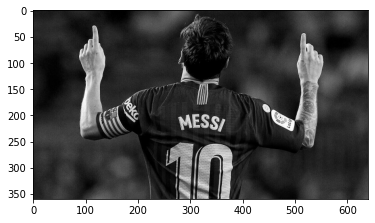

In [2]:
img = plt.imread('messi5.jpg')
img = np.sum( img*[.2126, .7152, .0722], axis=2 ).astype('uint8')

print( img.dtype, img.shape )

plt.imshow( img, cmap='gray')
plt.show()

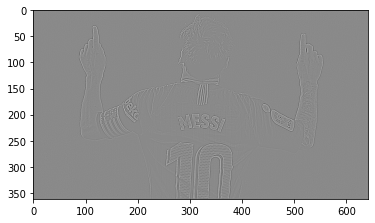

In [10]:
from scipy import signal
a = signal.convolve( img, [ [-1,-1,-1], [-1,8,-1], [-1,-1,-1] ] )

plt.imshow( a, cmap='gray')
plt.show()

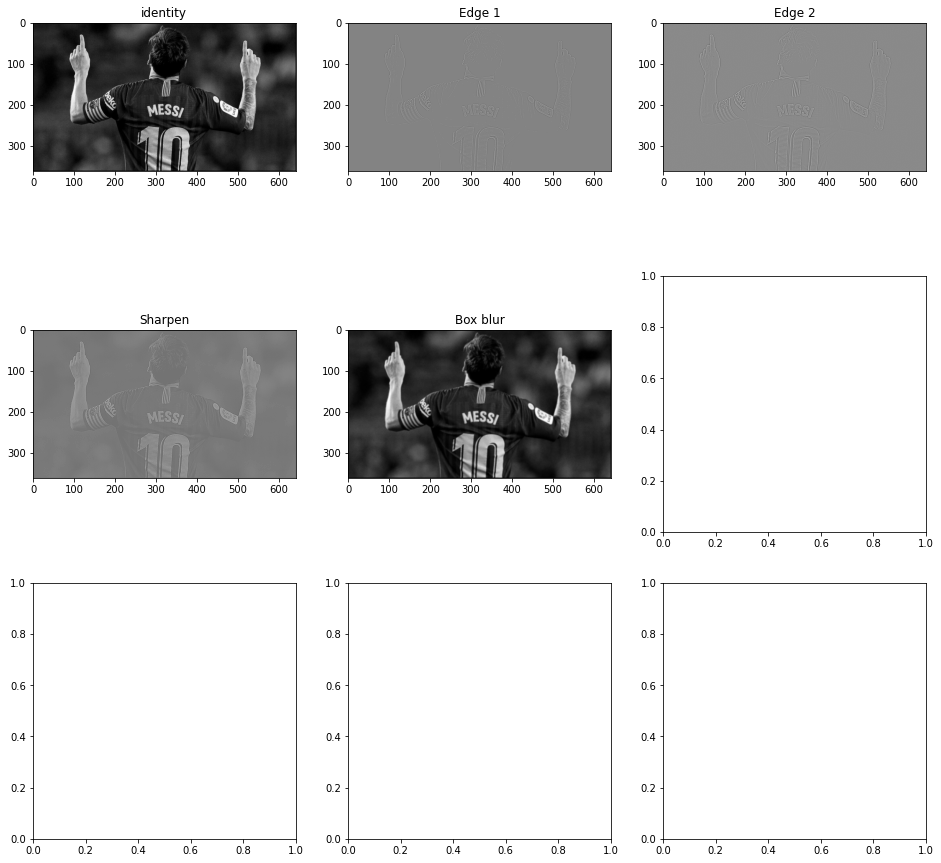

In [25]:
from scipy import signal

kernels = [ ]
kernels.append( [ "identity" , '0 0 0; 0 1 0; 0 0 0' ] )
kernels.append( [ "Edge 1" ,   '0 -1 0; -1 4 -1; 0 -1 0' ] )
kernels.append( [ "Edge 2" ,   '-1 -1 -1; -1 8 -1; -1 -1 -1' ] )
kernels.append( [ "Sharpen" ,  '0 -1 0; -1 5 -1; 0 -1 0' ] )
kernels.append( [ "Box blur" ,  '1 1 1; 1 1 1; 1 1 1', 9 ] )

fig, axis = plt.subplots(3, 3,figsize=(16,16))

for i, kernel_info in enumerate( kernels ): 
    title = kernel_info[0]
    kernel = np.matrix( kernel_info[1] )
    if len(kernel_info) > 2 : kernel = kernel/kernel_info[2] 
    a = signal.convolve( img, kernel )
    ax = axis[ i//3, i%3 ]
    ax.imshow( a, cmap='gray' )
    ax.set_title( title )
pass

plt.show()

